# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [9]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [10]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Read the data
df = pd.read_csv('/content/foodhub_order (1).csv')

In [12]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [13]:
# Check the shape of the dataset
df.shape

(1898, 9)

#### Observations:
*   There are 1898 rows and 9 columns in the dataset.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [14]:
# check the data types of different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   There are 5 numerical columns in data and 4 object type data.
*   We can see that there are mixed data type values in 'rating' column and is being read as object type because there are some values as 'not given' which should actually be read as missing values (NaN).




In [15]:
# Replace 'not given' with NaN and convert the 'rating' column to numeric
df['rating'] = df['rating'].replace('not given', np.nan)  # Replace 'not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert 'rating' column to numeric

# Create a copy of the DataFrame before treating missing values
df_original = df.copy()  # This copy will store the original state before treating missing values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [30]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Display missing values for each column
print(missing_values)

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


In [31]:
# Calculate the percentage of missing values in the 'rating' column
missing_percentage_rating = df['rating'].isnull().mean() * 100

# Display the result
print(f"Percentage of missing values in the 'rating' column: {round(missing_percentage_rating, 2)}%")

Percentage of missing values in the 'rating' column: 38.78%


#### Observations:


*   There are 736 missing values in 'rating' column which is 38.78% of total ratings
*   We can treat them by Mode value of the column



In [32]:
# Treat the missing values in the original df
mode_value = df['rating'].mode()[0]  # Calculate the mode of the 'rating' column
df['rating'].fillna(mode_value, inplace=True)  # Replace NaN with the mode value

In [34]:
# Print the updated dataframe
print(df)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         Weekend     5.0   
1          Japanese        

####Observation:

*   Missing values are replaced by mode value 5.0 in 'rating' column.
  



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [36]:
# Check the statistical summery of data
df_original.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

*   The minimum food preparation time is 20 minutes
*   The average food preparation time is 27.37 minutes
*   The maximum food preparation time is 35 minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Display missing values for each column
print(missing_values)

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


#### Observations:

*   736 orders are not rated.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

####Observations:
*   There are total 1898 values in 'order-id' column.

*   There is no missing value.

*   1898 unique values implies that each order is assigned a distinct order_id.





####Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

####Observations:
*   1200 unique customer IDs indicates a diverse customer base.
*   Many customers made multiple orders.
*   There is an opportunity for further analysis.


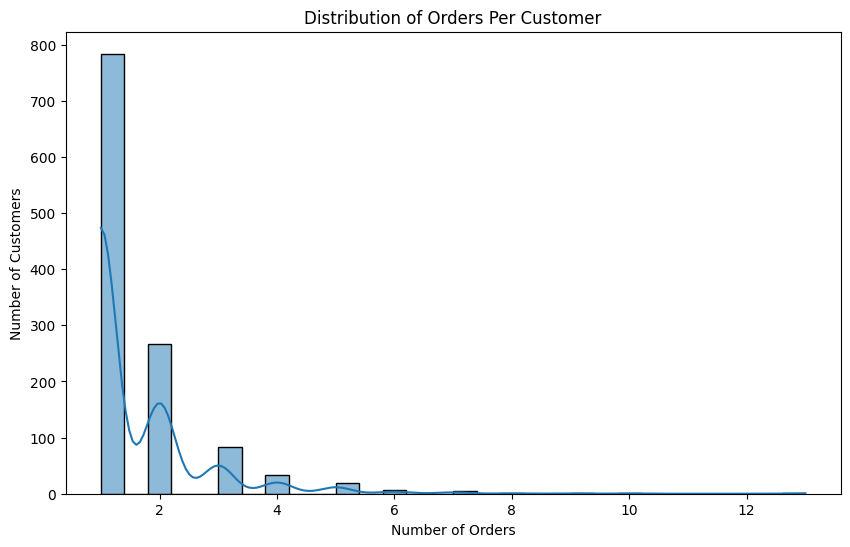

In [ ]:
# Count the number of orders per customer
orders_per_customer = df['customer_id'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()


####Observations:
*   The distribution is skewed towards right.
*   Highest number of people i.e., nearly 800 customers ordered 1 time.
*   Few people ordered more than 12 times.

In [ ]:
# Count the number of orders per customer
orders_per_customer = df['customer_id'].value_counts()

# Find customers who ordered only 1 time
one_time_customers = orders_per_customer[orders_per_customer == 1].count()

# Find customers who ordered more than 1 time
more_than_one_time_customers = orders_per_customer[orders_per_customer > 1].count()

# Calculate total number of customers
total_customers = orders_per_customer.count()

# Calculate the percentage of customers who ordered only 1 time
percentage_one_time = (one_time_customers / total_customers) * 100

# Calculate the percentage of customers who ordered more than 1 time
percentage_more_than_one_time = (more_than_one_time_customers / total_customers) * 100

# Display the results
print(f"Percentage of customers who ordered only 1 time: {round(percentage_one_time, 2)}%")
print(f"Percentage of customers who ordered more than 1 time: {round(percentage_more_than_one_time, 2)}%")


Percentage of customers who ordered only 1 time: 65.33%
Percentage of customers who ordered more than 1 time: 34.67%


####Observations:

*   65.33% of customers ordered only 1 time, there is an opprotunity to take measures to make them repeated customer.
*   34.67% of customers ordered more than 1 time.



####Restaurants Name

In [ ]:
# checking unique customer ID
df['restaurant_name'].nunique()

178

####Observation:

*   There are 178 restaurants in this dataset.




####Cuisine types

In [ ]:
# checking unique cuisine type
df['cuisine_type'].nunique()

14

####Observations:

*   There are 14 different types of cuisine being ordered in these restaurants.




<Axes: xlabel='cuisine_type', ylabel='count'>

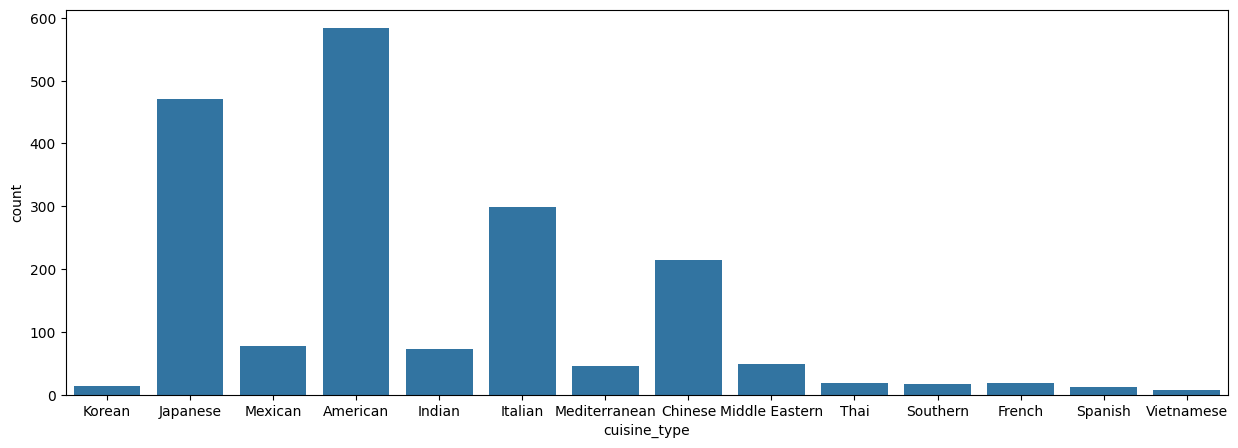

In [ ]:
# creating a countplot for cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

####Observations:
*   The most ordered cuisine type is American, second highest order from Japanese and then Italian.
*   The minimum order was being made from the type of Vietanmese cuisine.

####Cost of the orders

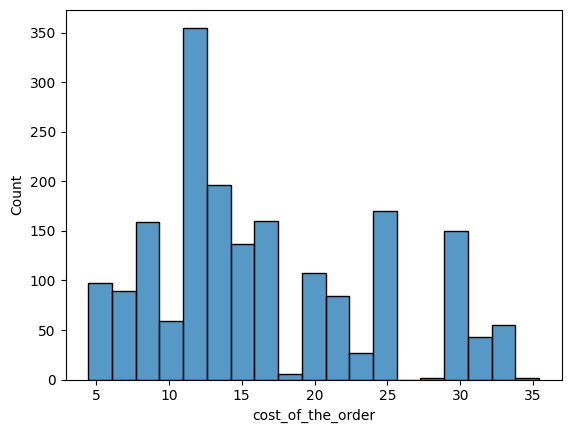

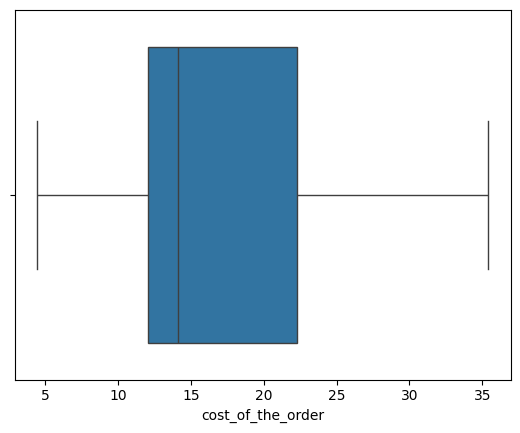

In [ ]:
## Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

####Observations:

*   Cost of order varies from 5 dollars to 35 dollars.
*   Highest number of order came from cost of order around 12 dollars.
*   There are no outliers.



####Days of the week

In [ ]:
# Checking the unique values for the 'day_of_the_week' column
df['day_of_the_week'].nunique()

2

####Observation:

*   There are two unique values in days of the week which are weekday and weekend.

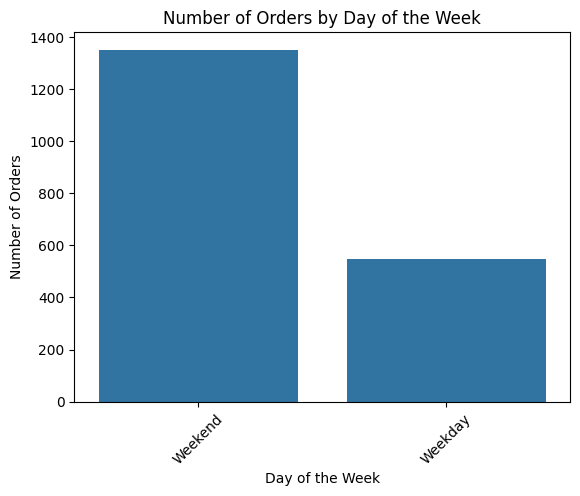

In [ ]:
# Ploting the bar graph for the 'day_of_the_week' column
sns.countplot(data=df, x='day_of_the_week')

# Adding titles and labels
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the number of orders in weekends and weekdays
weekend_orders = df[df['day_of_the_week'] == 'Weekend'].shape[0]
weekday_orders = df[df['day_of_the_week'] == 'Weekday'].shape[0]

# Calculate the percentage of orders for weekends and weekdays
weekend_percentage = (weekend_orders / total_orders) * 100
weekday_percentage = (weekday_orders / total_orders) * 100

# Display the results
print(f"Percentage of orders on weekends: {round(weekend_percentage, 2)}%")
print(f"Percentage of orders on weekdays: {round(weekday_percentage, 2)}%")

Percentage of orders on weekends: 71.18%
Percentage of orders on weekdays: 28.82%


####Observations:

*  There is big difference between the number of orders in weekend and weekdays.
*   There is 71.18% of orders in weekends and 28.82% from weekdays.
*   Highest number of orders in weekends is 1350 and in weekdays is 550.



####Rating

In [ ]:
# Check the unique values for the 'rating' column
df_original['rating'].nunique()

3

<Axes: xlabel='rating', ylabel='count'>

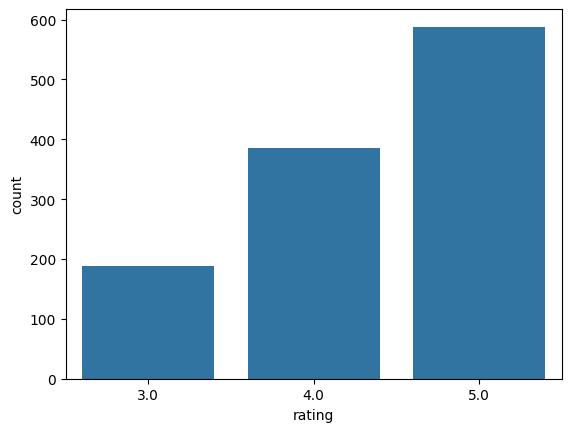

In [37]:
# ploting bar graph for 'rating' column
sns.countplot(data = df_original, x = 'rating')

In [38]:
# Calculate the count of each rating
rating_counts = df_original['rating'].value_counts()

# Calculate the percentage of customers for each rating
rating_percentage = (rating_counts / df_original.shape[0]) * 100

# Display the result
print(rating_percentage)

5.0    30.979979
4.0    20.337197
3.0     9.905163
Name: rating, dtype: float64


####Observations:

*   30.97 % of customers has given the highest rating 5.0.
*   20.33% of customers has given 4.0 rating and only 9.9% has given lowest rating 3.0.







####Food preparation time

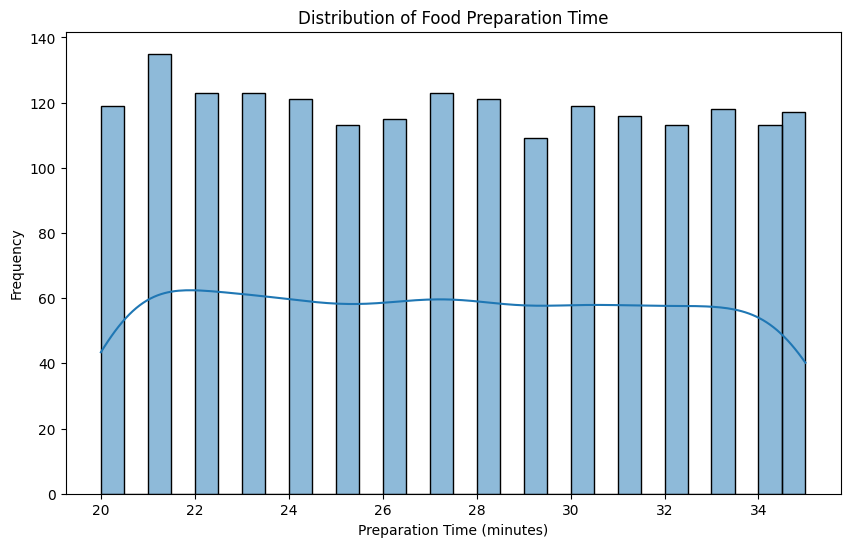

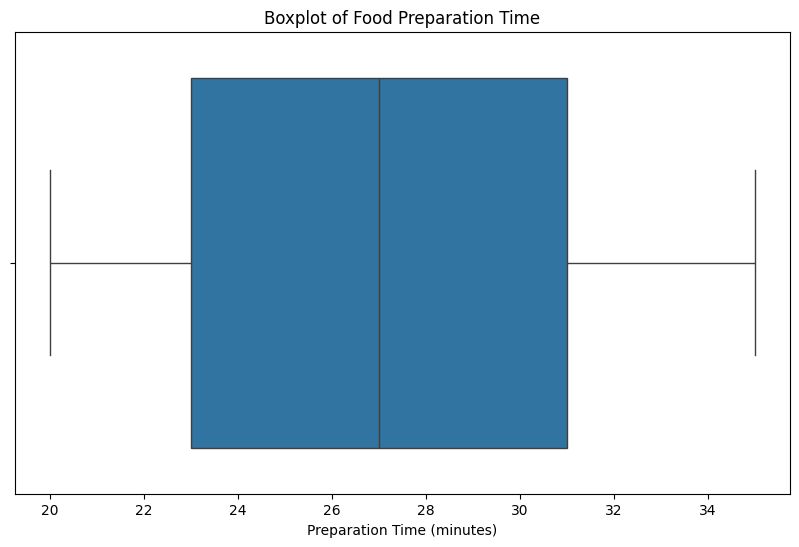

In [ ]:
# Ploting histogram for food preparation time
plt.figure(figsize=(10, 6))
sns.histplot(df['food_preparation_time'], bins=30, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()


####Observations:
*  Food preparation time is evenly distributed.
*  There is no outliers



####**Delivery time**

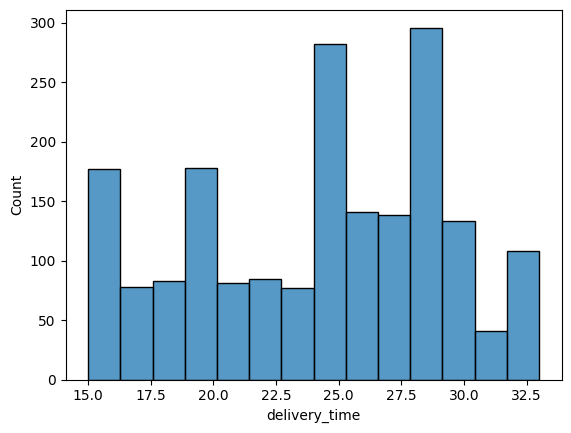

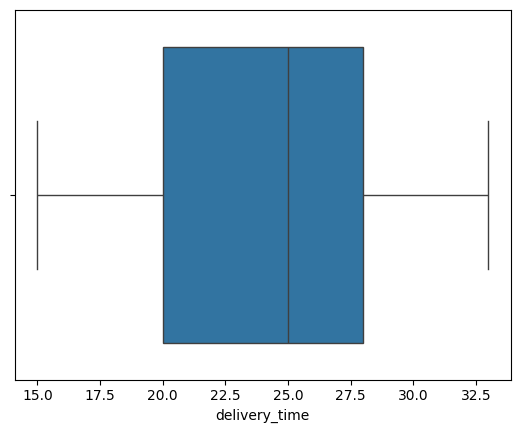

In [ ]:
# ploting the histogram for the delivery time
sns.histplot(data=df,x='delivery_time')
plt.show()
# ploting the boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

####Observations:

*   Average delivery time is 25 minutes.
*   Minimum delivery time is 15 minutes and maximum delivery time is 33 minutes.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# finding top 5 restaurants in terms of the number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


####Observations:

*   The name of the top 5 restaurants in terms of the number of orders received are **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm'** with 219, 132, 119, 96 and 68 orders respectively.                       
*   **'Shake Shack'** leads significantly with 219 orders, showing strong customer preference.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the DataFrame for weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type on weekends
most_popular_cuisine = df_weekend['cuisine_type'].value_counts().idxmax()
print(most_popular_cuisine)

American


#### Observation:

*   The most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
*   Perchentage of orders above 20 dollars is 29.24 %.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
*   The mean delivery time is 24.26 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of each customer_id
top_customers = df['customer_id'].value_counts().head(3)

print("Top 3 most frequent customers and their order counts:")
print(top_customers)

Top 3 most frequent customers and their order counts:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:

*   Top 3 most frequent customers' IDs are 52832, 47440 and 83287
*   They placed 13, 10 and 9 numbers of orders respectively




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Find the relation between cuisine vs Cost of the order

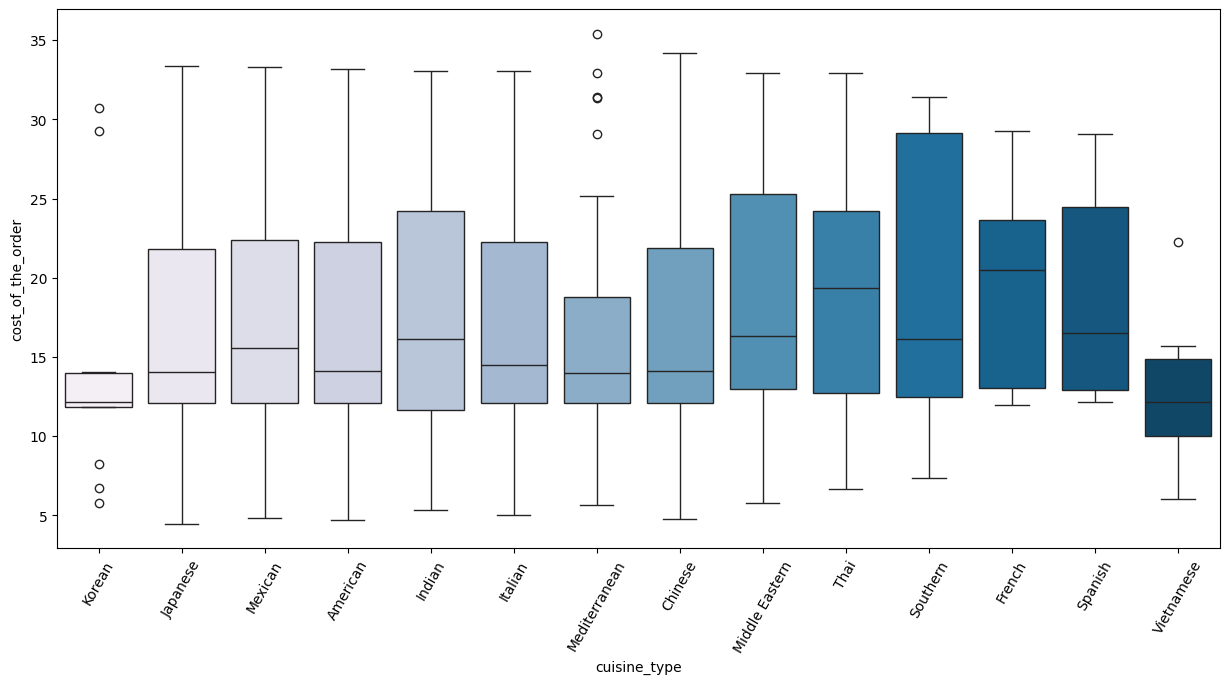

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

####Observation:

*   There are some outliers in cuisine type Korean which implies that there are orders which are below of the minimum cost and above of the maximum cost

*   There are some orders in Mediterranean and Vietnamese cuisine type which are above of the maximum price and identified as outliers
*   In genarel, the cost of these three types of cuisines is lower than other cuisine types




#### Cuisine vs Food Preparation time

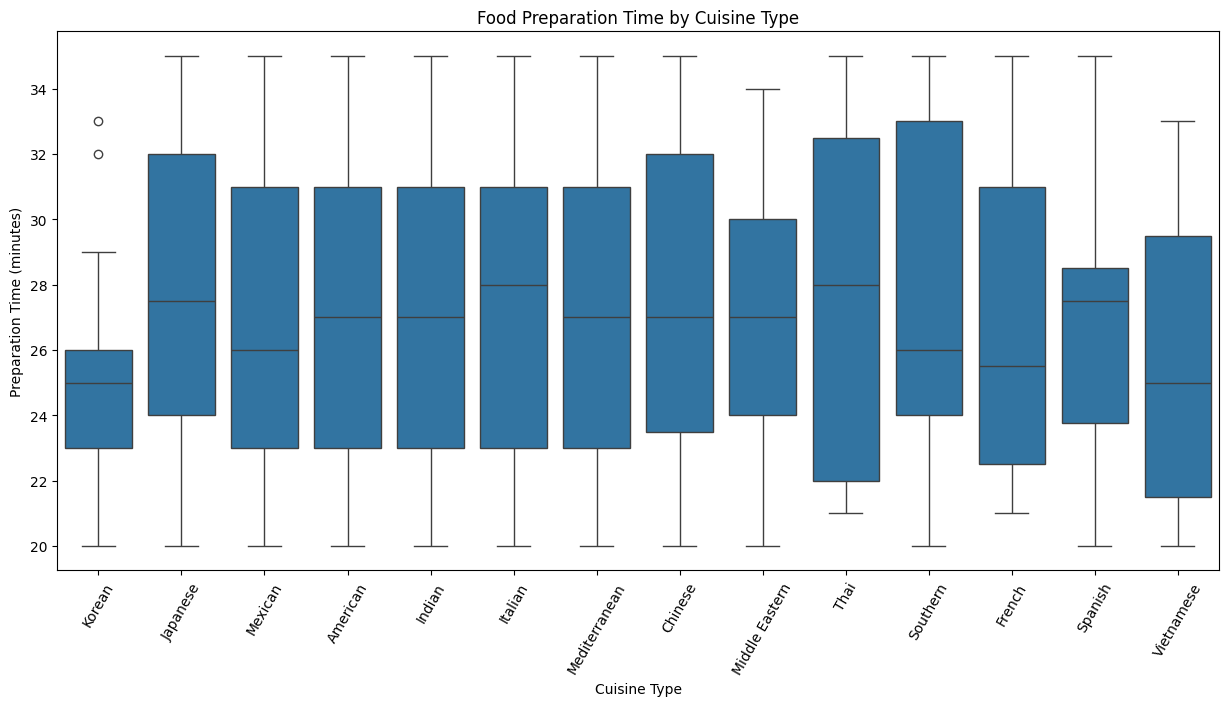

In [ ]:
# Relationship between cuisine type and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=60)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Preparation Time (minutes)')
plt.show()

####Observations:

*   Most of the cuisines have food preparation time from 20 to 35 minutes.
*   For cuisine type Korean the maximum food preparation time is 26 minutes which is much lower than all other cuisine types but it has some outliers. These outlieres imply that the food preparation time of some orders are above 30 minutes.







#### Day of the Week vs Delivery time

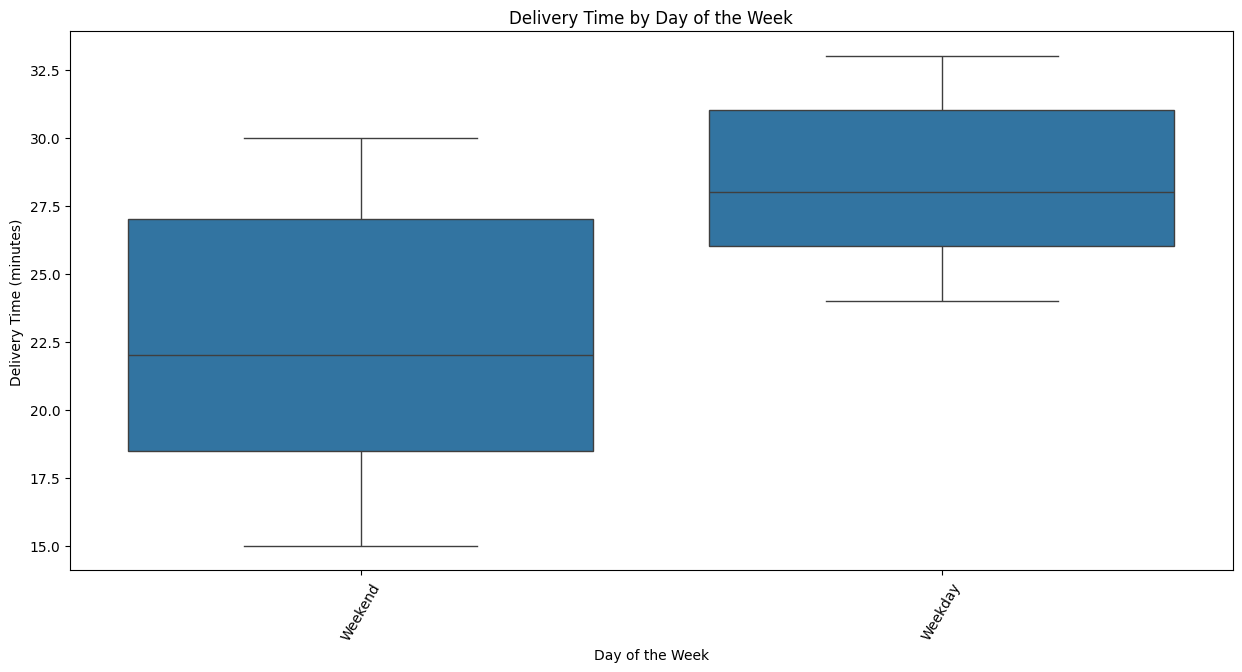

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15, 7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

####Observation:

*   There is big difference in delivery time between weekdays and weekends.
*   In weekends minimum delivery time is 15 minutes, maximum time is 27 minutes and average time is 22 minutes.

*   In weekdays minimum delivery time is 25 minutes, maximum time is 33 minutes and average time is 28 minutes.






#### Rating vs Delivery time

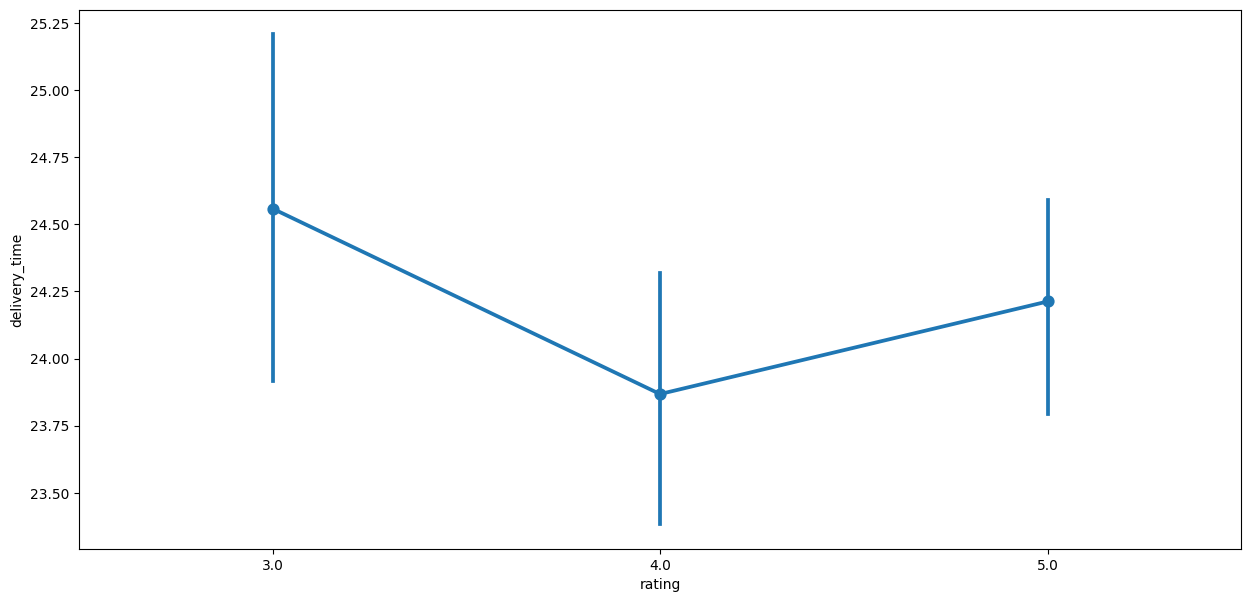

In [39]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df_original)
plt.show()

####Observation:

*   There is no positive or negative relation between rating and delivery time




#### Rating vs Food preparation time

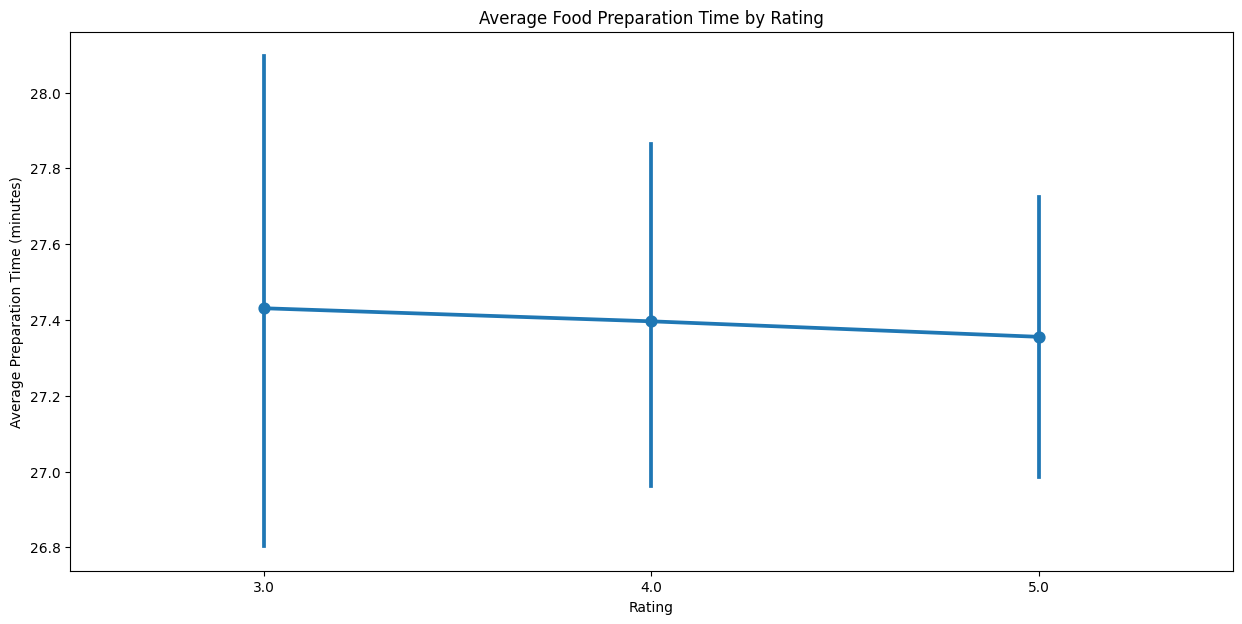

In [40]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df_original, estimator='mean')
plt.title('Average Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Preparation Time (minutes)')
plt.show()

####Obsrvations:

*   Foods with higher preparation time received lower ratings and the foods with lower preparation time received higher ratings.
*   It may have some relationship between total time taking from placing order to receiving it and rating.






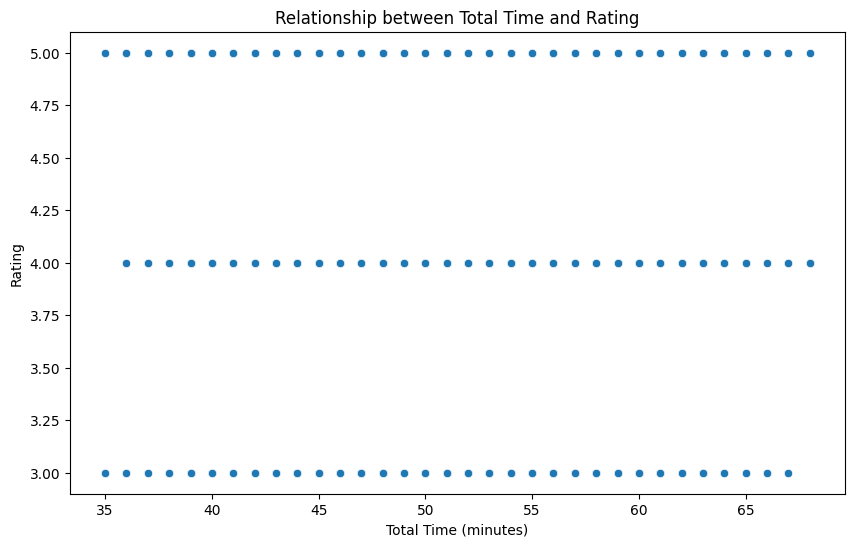

Correlation between total time and rating: -0.01


In [41]:
# Step 1: Calculate the total time (food preparation time + delivery time)
df_original['total_time'] = df_original['food_preparation_time'] + df_original['delivery_time']

# Step 2: Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_time', y='rating', data=df_original)
plt.title('Relationship between Total Time and Rating')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Rating')
plt.show()

# Step 3: Check the correlation between total time and rating
correlation = df_original['total_time'].corr(df_original['rating'])
print(f"Correlation between total time and rating: {round(correlation, 2)}")


####Observations:


*   The correlation of -0.01 indicates that there is almost no linear relationship between the total time taken to receive an order and the rating given by customers.
*   The very weak negative correlation suggests that variations in total time do not significantly affect customer ratings.

#### Rating vs Cost of the order

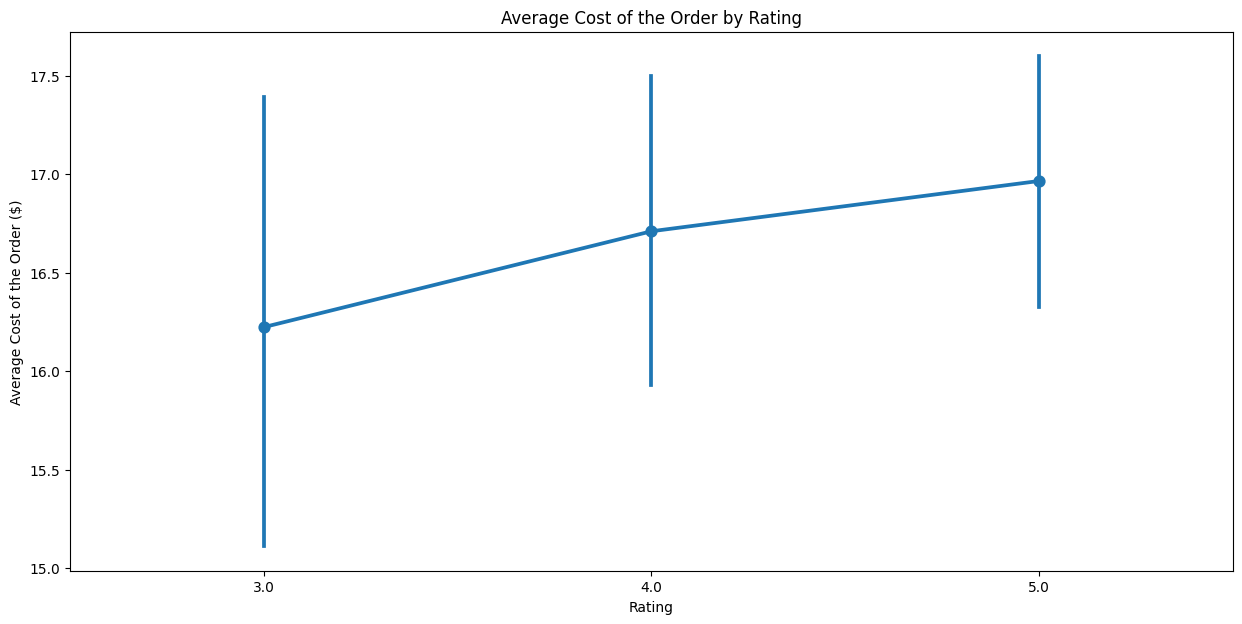

In [42]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df_original, estimator='mean')
plt.title('Average Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Cost of the Order ($)')
plt.show()

####Observations:

*   We see that the higher the cost of order the higher rating, that means cost of order does not affect ratings.




## Correlation among variables

### Finding the relationship between cost of the order, food preparation time and delivery time

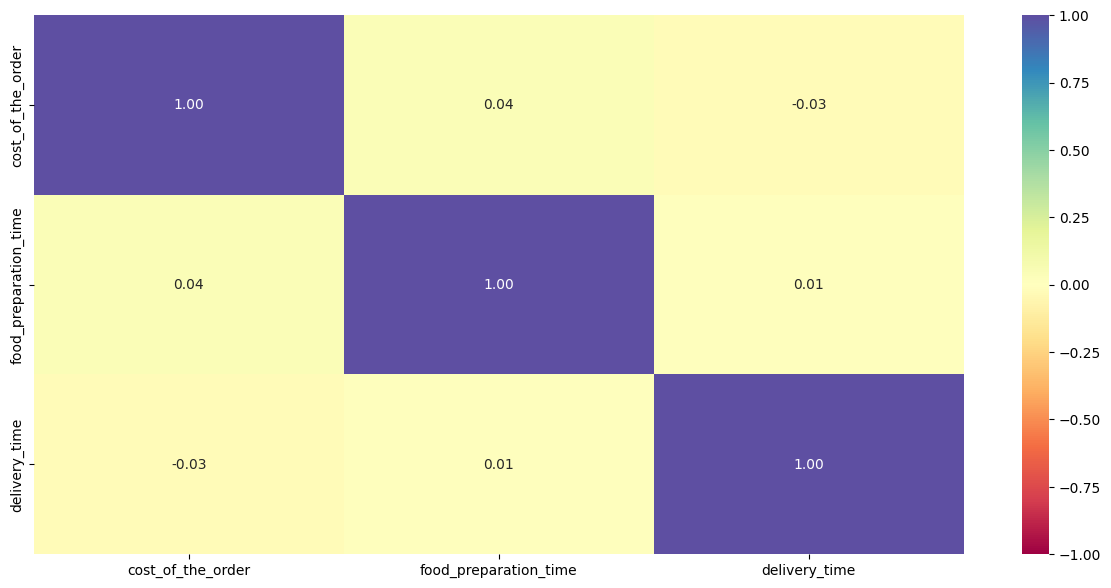

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observations:

*  **Cost of Order & Delivery Time (-0.03):** There is a very weak negative correlation, suggesting that the cost of an order has almost no impact on the delivery time.

*   **Food Preparation Time & Cost of Order (0.04):** The slight positive correlation indicates that higher-cost orders may take marginally longer to prepare, but the relationship is negligible.

*   **Food Preparation Time & Delivery Time (0.01):** The near-zero correlation shows that the time taken to prepare the food has no significant relationship with the delivery time.
*   Overall, the correlations are very weak, suggesting minimal or no relationships between these variables.




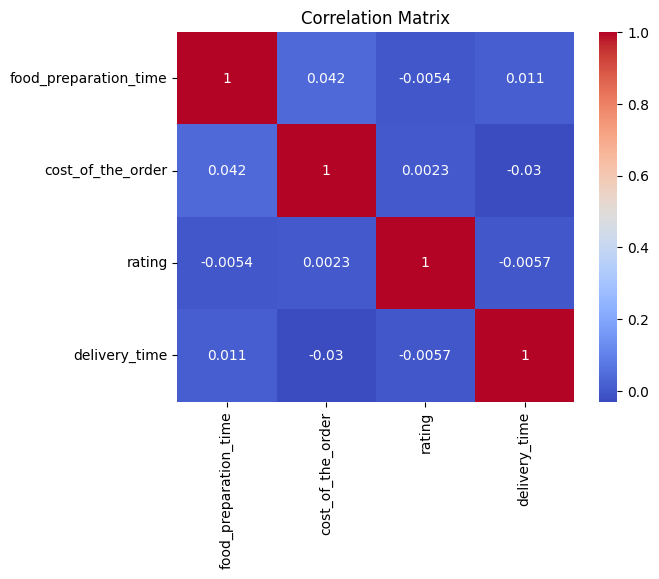

In [ ]:
# Correlation matrix
correlation_matrix = df[['food_preparation_time', 'cost_of_the_order', 'rating', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###Observations from Correlation Matrix:


*   **Cost of Order & Food Preparation Time (0.042):** There is a very weak positive correlation, suggesting that cost has almost no impact on how long it takes to prepare the food.

*   **Cost of Order & Rating (0.0023):** The near-zero correlation implies that the cost of an order has virtually no influence on the customer rating.

*  **Rating & Food Preparation Time (-0.0054):** The slight negative correlation suggests that preparation time does not meaningfully affect the rating given by customers.

*   **Rating & Delivery Time (-0.0057):** The very weak negative correlation shows that delivery time has almost no effect on customer ratings.

*   **Food Preparation Time & Delivery Time (0.011):** There is a near-zero correlation, indicating that preparation time and delivery time are almost independent of each other.

All correlations are extremely weak, indicating no significant relationships between cost, ratings, food preparation time, or delivery time.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [16]:
# Group by 'restaurant_name' to get the count and mean of ratings for each restaurant
restaurant_stats = df_original.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants that meet the criteria: more than 50 ratings and average rating greater than 4
promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the restaurants that qualify for the promotional offer
print(promotional_restaurants)

               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:

*   There are four restaurants those have rating count more than 50 and the average rating is greater than 4 are **'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack' and 'The Meatball Shop'**.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate the revenue based on the order cost
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25  # 25% for orders over $20
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15  # 15% for orders over $5
    else:
        return 0  # No revenue for orders $5 or less

# Apply the revenue calculation function to each row
df['revenue'] = df.apply(calculate_revenue, axis=1)

# Calculate the total net revenue
total_net_revenue = df['revenue'].sum()

# Display the total net revenue
print("Total net revenue generated by the company across all orders is:", round(total_net_revenue, 2))


Total net revenue generated by the company across all orders is: 6166.3


#### Observations:

*   Total net revenue generated by the company across all orders is: 6166.3




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time (preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Get the count of orders that take more than 60 minutes
orders_above_60 = df[df['total_delivery_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Display the result
print("Percentage of orders that take more than 60 minutes to get delivered:", round(percentage_above_60, 2), '%')


Percentage of orders that take more than 60 minutes to get delivered: 10.54 %


#### Observations:

*   Percentage of orders that take more than 60 minutes to get delivered: 10.54 %




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Display the result
print("Mean Delivery Time on Weekdays and Weekends:")
print(mean_delivery_time)

Mean Delivery Time on Weekdays and Weekends:
  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:


*   Weekday vs. Weekend Delivery Times: The mean delivery time on weekdays (28.34 minutes) is noticeably higher than on weekends (22.47 minutes).

*   Potential Reasons:

1.   Weekday Delays: The higher delivery time during weekdays may be due to traffic, higher order volumes during working hours, or other logistical challenges.
2.   Weekend Efficiency: The lower delivery time on weekends could indicate better traffic conditions, lower order volumes, or more efficient delivery operations.







### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
**1.  Delivery Time Differences:** Delivery times are longer on weekdays compared to weekends, which could impact customer satisfaction during busy workdays.

**2. Weak Correlations Between Key Variables:** Cost of the order, food preparation time, and ratings have very weak or negligible correlations, indicating that these factors don’t strongly influence one another.

**3. Customer Ratings and Order Cost:** There is no significant relationship between the cost of an order and the rating given by customers, suggesting that customers value other factors, such as food quality and service, more than price.

**4. Top Performing Restaurants:** Certain restaurants (e.g., Shake Shack) receive significantly more orders than others, highlighting their strong customer preference.

**5.  Cuisine Type and Ratings:** Some cuisines may perform better in terms of customer satisfaction, but the analysis showed that there is no strong relationship between preparation time or delivery time and ratings.

### Recommendations:

**1. Optimize Weekday Operations:** Focus on improving delivery times on weekdays. Consider adding more delivery staff or optimizing routes to reduce delivery delays during busy hours.

**2. Leverage High-Performing Restaurants:** Promote high-performing restaurants such as Shake Shack and The Meatball Shop in your advertising campaigns. Consider offering loyalty rewards or exclusive promotions to keep their customers engaged.

**3. Use Customer Feedback:** Since cost does not strongly influence ratings, focus on improving the overall customer experience (e.g., food quality, packaging, service) to boost ratings and encourage repeat orders.

**4. Promote Popular Cuisine Types:** Analyze the feedback and orders from popular cuisines. Consider creating special promotions or discounts for top-rated cuisines, especially on weekends when delivery times are faster, to attract more orders.

**5. Targeted Promotions for High-Rating Restaurants:** Offer promotional discounts to restaurants with more than 50 ratings and an average rating of 4 or above to further increase their visibility and incentivize more customer engagement.

**6. Monitor Low-Performing Restaurants:** Identify restaurants with consistently low ratings or slow preparation times and work with them to improve service, food quality, or speed to enhance customer satisfaction and avoid negative reviews.

By focusing on delivery efficiency, customer experience, and leveraging high-performing restaurants and cuisines, the business can enhance customer satisfaction and drive more orders.

---